In [1]:
import source.prepare_data as prd
import source.dataset as dat
import source.multi_layer_perceptron as mlp
import source.table as tb
import source.comparision as comp

C:\Python_files\DL_final2\.venv\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
import pandas as pd
import spacy
from importlib import reload

In [12]:
reload(prd)
reload(dat)
reload(mlp)
reload(tb)
reload(comp)

<module 'source.comparision' from 'C:\\Python_files\\DL_final2\\source\\comparision.py'>

In [4]:
"""
1) Preprocessing
"""
# load models and dataset
df = pd.read_csv("hf://datasets/gxb912/large-twitter-tweets-sentiment/train.csv", nrows=100)
nlp = spacy.load("en_core_web_sm")

In [5]:
# prepare dataset
df = prd.prepare_df(df, nlp)

# create dataset out of cleaned columns
dataset = dat.Text_Dataset(df, col_text="clean_text_str", col_label="sentiment", args={"max_features":5000})
dataset.split_dataset()


In [6]:
X_train_TF, X_test_TF, Y_train_TF, Y_test_TF = dataset.get_encodings(tfidf=True)

mlp_tdidf_params = mlp.find_best_mlp(X_train=X_train_TF,
                                     Y_train=Y_train_TF,
                                     X_test=X_test_TF,
                                     Y_test=Y_test_TF,
                                     n_trials=3)

[I 2025-06-13 23:10:31,535] A new study created in memory with name: mlp_optimization


[I 2025-06-13 23:10:32,702] Trial 0 finished with values: [0.6807798147201538, 0.550000011920929] and parameters: {'epochs': 121, 'learning_rate': 0.40445108107816413, 'units': 10}.
[I 2025-06-13 23:10:33,368] Trial 1 finished with values: [0.7199617624282837, 0.550000011920929] and parameters: {'epochs': 172, 'learning_rate': 0.43066675069695187, 'units': 10}.
[I 2025-06-13 23:10:34,088] Trial 2 finished with values: [0.7255399823188782, 0.6499999761581421] and parameters: {'epochs': 200, 'learning_rate': 0.3671533520152799, 'units': 6}.


{'loss': 0.7255399823188782, 'accuracy': 0.6499999761581421, 'params_epochs': 200.0, 'params_learning_rate': 0.3671533520152799, 'params_units': 6.0, 'time': 0.8505819999999998}


In [7]:
vocab_size = comp.test_vocab_size(df)
split_size = comp.test_split_ratio(dataset)

Intializing test of vocab size with: lr = 0.1, epochs = 100, units = 5.
Embeding is BOW...WARNING:tensorflow:5 out of the last 5 calls to <function Model.make_test_function.<locals>.test_function at 0x0000015179041480> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has reduce_retracing=True option that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/guide/function#controlling_retracing and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
.....
The result is: [(1000, 0.5), (2000, 0.6), (3000, 0.65), (4000, 0.55), (5000, 0.65), (6000, 0.6), (7000, 0.55), (8000, 0.6)]
Intializing test split with: lr = 0.1, epochs = 100, units = 5.
Embeding is BOW.....

In [34]:
table = tb.Table()
table.add_record(name="mlp_bow",
                 epoch=mlp_tdidf_params["params_epochs"],
                 lr=mlp_tdidf_params["params_learning_rate"],
                 units=mlp_tdidf_params["params_units"],
                 avg_time=mlp_tdidf_params["time"],
                 split_accuracy=split_size,
                 vocab_accuracy=vocab_size)

Adding a new record with params: name: mlp_bow, epoch: 200.0, lr: 0.3671533520152799, units: 6.0, average time: 0.8505819999999998


In [35]:
table.add_record(name="mlp_5",
                 epoch=20,
                 lr=0.5,
                 units=4,
                 avg_time=20.5,
                 split_accuracy=[(0.1, 0.7), (0.2, 0.3), (0.3, 0.6), (0.4, 0.55), (0.5, 0.7)],
                 vocab_accuracy=[(1000, 0.65), (2000, 0.56), (3000, 0.1), (4000, 0.4), (5000, 0.55), (6000, 0.55), (7000, 0.6), (8000, 0.9)])

Adding a new record with params: name: mlp_5, epoch: 20, lr: 0.5, units: 4, average time: 20.5


In [10]:
table.show(tabulate_view=True)


Table info:
<class 'pandas.core.frame.DataFrame'>
Index: 2 entries, 0 to 1
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   name            2 non-null      object 
 1   epochs          2 non-null      float64
 2   lr              2 non-null      float64
 3   units           2 non-null      float64
 4   avg_time        2 non-null      float64
 5   split_accuracy  2 non-null      object 
 6   vocab_accuracy  2 non-null      object 
dtypes: float64(4), object(3)
memory usage: 128.0+ bytes
None

Records preview:
| name    |   epochs |       lr |   units |   avg_time | split_accuracy                                                     | vocab_accuracy                                                                                               |
|---------|----------|----------|---------|------------|--------------------------------------------------------------------|---------------------------------------------

In [33]:
reload(prd)
reload(dat)
reload(mlp)
reload(tb)
reload(comp)

<module 'source.comparision' from 'C:\\Python_files\\DL_final2\\source\\comparision.py'>

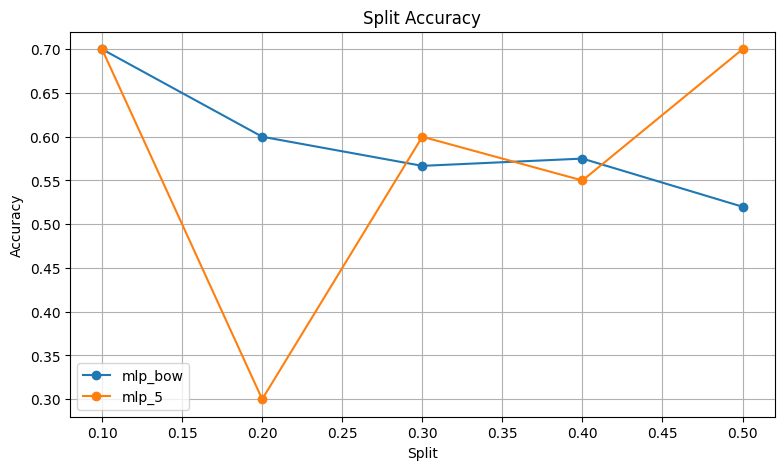

In [32]:
table.plot_split_accuracy()

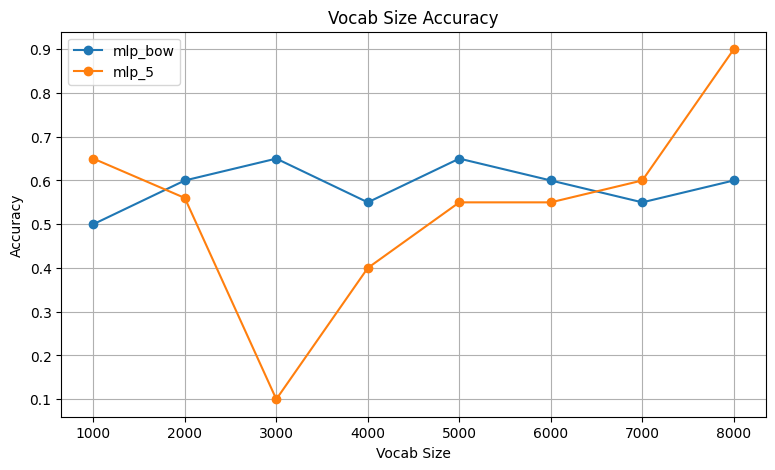

In [36]:
table.plot_vocab_accuracy()